In [46]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [47]:
year_colors = {
    2014: "red",
    2015: "blue",
    2016: "yellow",
    2017: "green",
    2018: "magenta",
    2019: "purple",
    2020: "brown",
    2021: "orange",
    2022: "pink",
    2023: "cyan"
}

with open('saved_tracks_with_features/saved_tracks_with_features_2023-10-28.json', 'r') as infile:
    saved_tracks_with_features = json.load(infile)

In [48]:
df = pd.json_normalize(saved_tracks_with_features)
df['year_added'] = pd.to_datetime(df['added_at']).dt.year
df = df[["name", "artist", "year_added", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", "uri", "added_at"]]

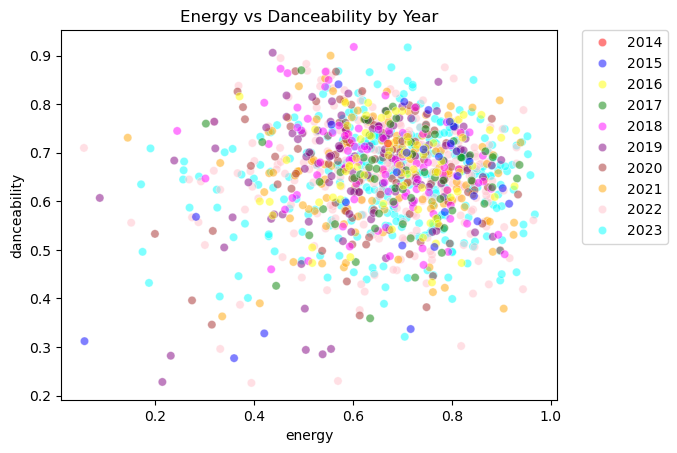

<Figure size 640x480 with 0 Axes>

In [49]:
sns.scatterplot(data=df, x="energy", y="danceability", hue="year_added", palette=year_colors, alpha=0.5)
plt.title("Energy vs Danceability by Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.clf()

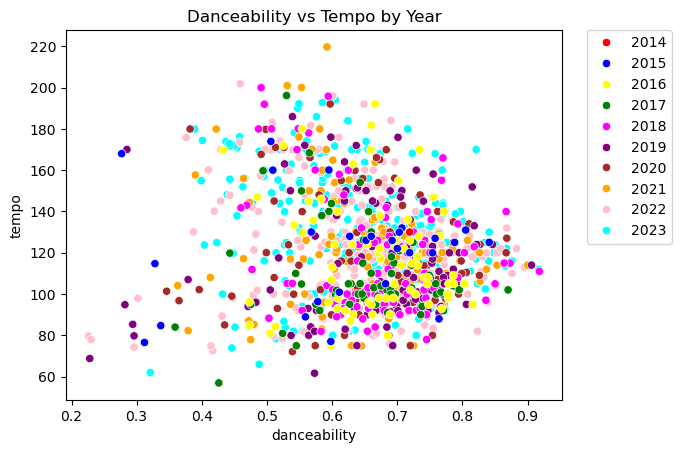

<Figure size 640x480 with 0 Axes>

In [50]:
sns.scatterplot(data=df, x="danceability", y="tempo", hue="year_added", palette=year_colors)
plt.title("Danceability vs Tempo by Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.clf()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


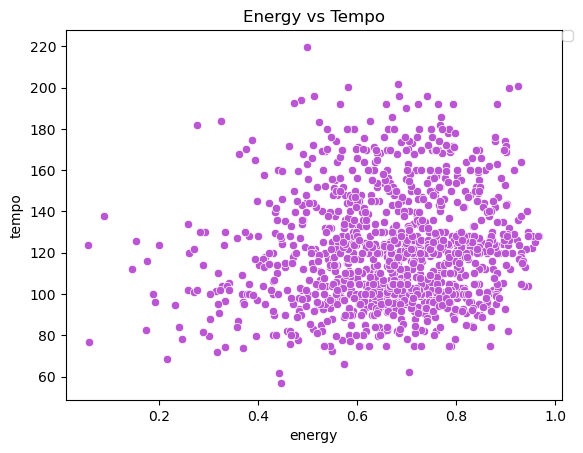

<Figure size 640x480 with 0 Axes>

In [51]:
sns.scatterplot(data=df, x="energy", y="tempo", color='mediumorchid')
plt.title("Energy vs Tempo")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()
plt.clf()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


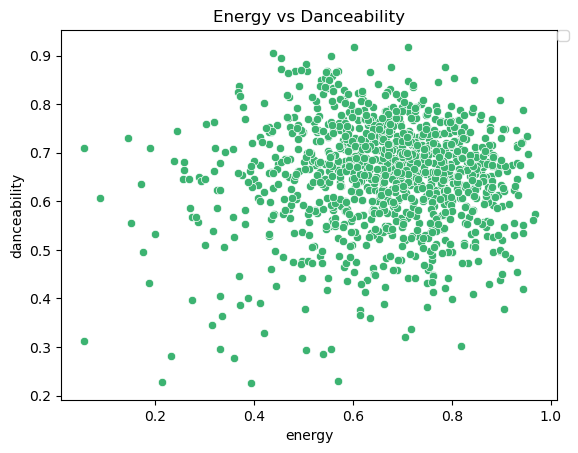

In [52]:
sns.scatterplot(data=df, x="energy", y="danceability", color='mediumseagreen')
plt.title("Energy vs Danceability")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


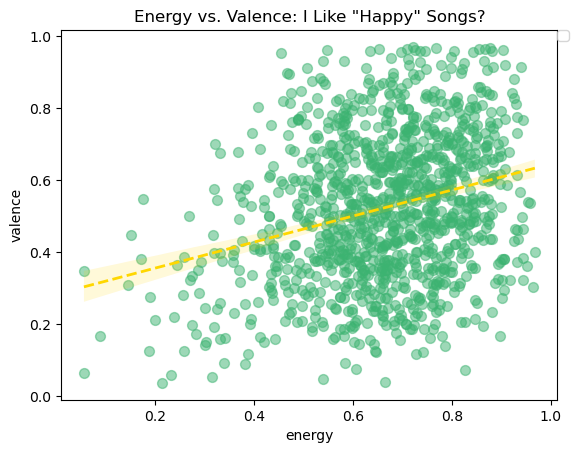

In [53]:
sns.regplot(data=df, x="energy", y="valence", color='mediumseagreen', line_kws={"linewidth": 2, "linestyle": "--", "color": "gold"}, 
            scatter_kws={"s": 50, "alpha": 0.5})
plt.title('Energy vs. Valence: I Like "Happy" Songs?')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

<Axes: xlabel='energy', ylabel='danceability'>

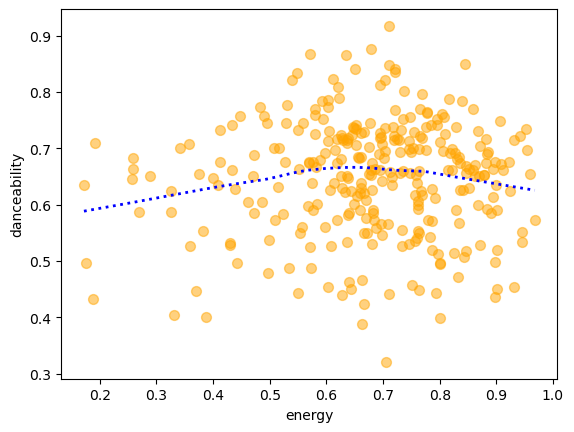

In [54]:
just_2023 = df[df['year_added'] == 2023]
sns.regplot(data=just_2023, x='energy', y='danceability', color='orange', line_kws={"linewidth": 2, "linestyle": 'dotted', "color": "blue"}, scatter_kws={"s": 50, "alpha": 0.5}, lowess=True)

Text(0.5, 1.0, 'Danceability vs. Valence: 2023')

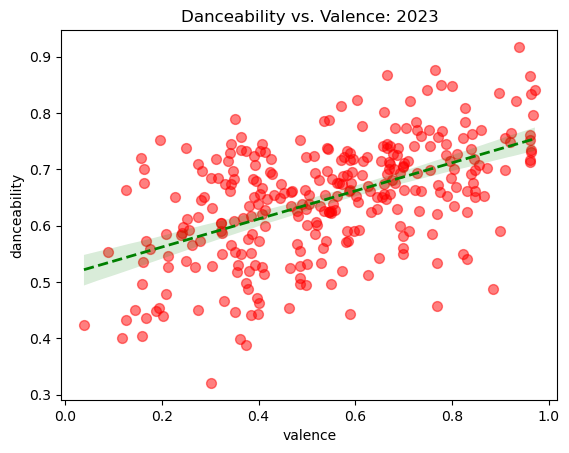

In [55]:
sns.regplot(data=just_2023, x='valence', y='danceability', color='red', line_kws={"linewidth": 2, "linestyle": "--", "color": "green"}, scatter_kws={"s": 50, "alpha": 0.5})
plt.title('Danceability vs. Valence: 2023')

In [56]:
features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

feature_means_dict = {}
for feature in features:
    mean = df[feature].mean()
    feature_means_dict[feature] = mean

feature_means_dict

{'danceability': 0.6526079646017698,
 'energy': 0.6633394690265486,
 'key': 4.9805309734513274,
 'loudness': -6.1957150442477875,
 'mode': 0.695575221238938,
 'speechiness': 0.06969442477876106,
 'acousticness': 0.20435930292035395,
 'instrumentalness': 0.01146241407079646,
 'liveness': 0.16527814159292037,
 'valence': 0.5235605309734512,
 'tempo': 121.26347079646018}

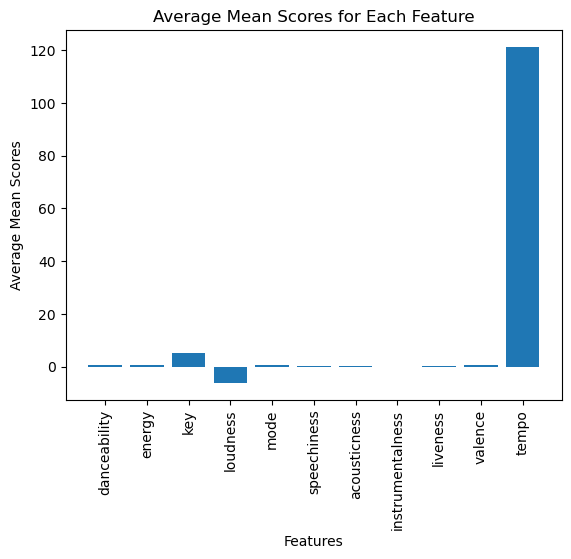

In [57]:
features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

feature_means_dict = {}
for feature in features:
    mean = df[feature].mean()
    feature_means_dict[feature] = mean

plt.bar(feature_means_dict.keys(), feature_means_dict.values())
plt.title("Average Mean Scores for Each Feature")
plt.xlabel("Features")
plt.ylabel("Average Mean Scores")
plt.xticks(rotation=90)
plt.show()

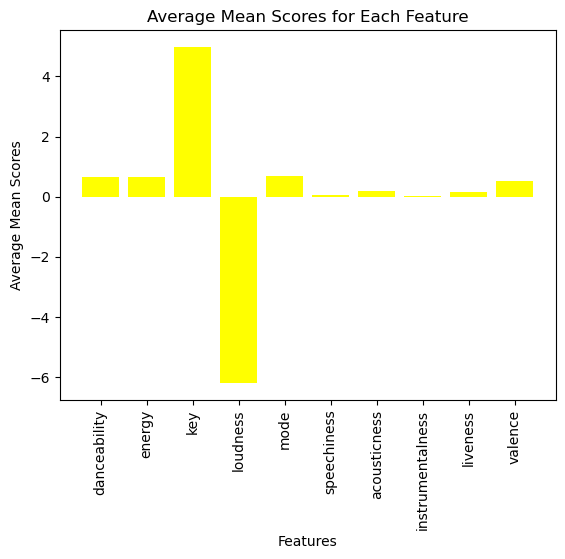

In [58]:
features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]

feature_means_dict = {}
for feature in features:
    mean = df[feature].mean()
    feature_means_dict[feature] = mean

plt.bar(feature_means_dict.keys(), feature_means_dict.values(), color='yellow')
plt.title("Average Mean Scores for Each Feature")
plt.xlabel("Features")
plt.ylabel("Average Mean Scores")
plt.xticks(rotation=90)
plt.show()

In [59]:
highest_danceability_song = df.loc[df['danceability'].idxmax(), 'name']
highest_danceability_song

'Forget to Forget'

In [60]:
top_10_danceability = df.sort_values(by='danceability', ascending=False).head(25)
top_10_danceability[['name', 'artist', 'danceability']]

,name,artist,danceability
941,Forget to Forget,shy martin,0.918
122,Pretty Girl Era,LU KALA,0.917
779,Gone,Charli XCX,0.906
559,Love Songs,Sarah Barrios,0.900
317,I Wanna Feel Good,Chris James,0.895
441,Tommy,Ralph,0.883
272,I Just Came To Dance,Mae Muller,0.876
401,Veronica,Leah Kate,0.876
884,Feels This Good,Kenzie Nimmo,0.873
989,High Without Your Love,Loote,0.870


In [61]:
highest_energy_song = df.loc[df['energy'].idxmax(), ['name', 'artist']]
highest_energy_song

name      Dancing In The Dark - Radio Edit
artist                    Breathe Carolina
Name: 101, dtype: object

In [62]:
top_10_energy = df.sort_values(by='energy', ascending=False).head(25)
top_10_energy[['name', 'artist', 'energy']]

,name,artist,energy
101,Dancing In The Dark - Radio Edit,Breathe Carolina,0.968
392,I'm Good (Blue),David Guetta,0.965
77,"Eli, Can I Come Over Tonight?",Dani Sylvia,0.959
12,Memories,Sam Feldt,0.954
250,10:35 (feat. Tate McRae) - PAJANE Remix,Tiësto,0.953
526,Beg for You (feat. Rina Sawayama),Charli XCX,0.945
56,If I Don't,Ally Hills,0.945
244,Here We Go Again,Oliver Tree,0.945
382,Layla - English Version,DJ Robin,0.944
59,Kiss Me Tonight,DEAMN,0.942


In [63]:
highest_valence_song = df.loc[df['valence'].idxmax(), 'name']
print(highest_valence_song)
top_10_valence= df.sort_values(by='valence', ascending=False).head(25)
top_10_valence[['name', 'artist', 'valence']]

Summer Baby


,name,artist,valence
160,Summer Baby,Jonas Brothers,0.971
349,What A Night - Rowdy In Rio,Flo Rida,0.968
3,Kickin',SUM SUN,0.967
1088,Pumped Up Kicks,Foster The People,0.965
363,IF YOU GO DOWN (I'M GOIN' DOWN TOO),Kelsea Ballerini,0.965
80,Accidentally In Love,TANDM,0.964
248,Kiss Me Already,Wolf and Love,0.964
245,Good Side,Rachel Grae,0.962
755,No Judgement,Niall Horan,0.962
521,Product of the 90s,Phangs,0.962


<Axes: xlabel='valence'>

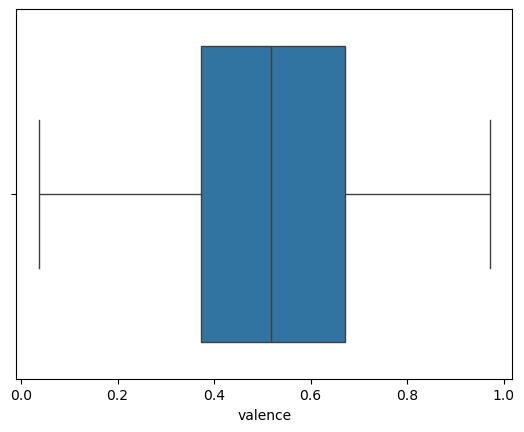

In [64]:
# create a boxplot from the top_10_valence dataframe
sns.boxplot(data=df, x='valence')

<Axes: xlabel='valence'>

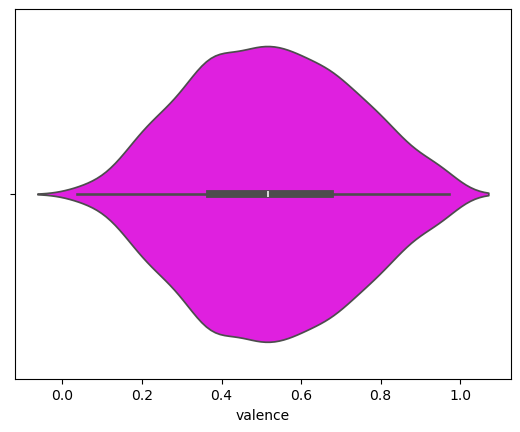

In [65]:
sns.violinplot(data=df, x='valence', color="magenta")

In [66]:
fig = px.scatter(df, x="energy", y="danceability", color="year_added", hover_data=['name', 'artist'])
fig.add_hline(y=df['danceability'].mean(), line_color='green', annotation_text = "Mean Danceability", annotation_position = 'bottom right')
fig.add_vline(x=df['energy'].mean(), line_color='black', annotation_text = "Mean Energy", annotation_position = 'top right')
fig.show()

In [67]:
fig = px.histogram(df, x="danceability", marginal=None, hover_data=df.columns, color_discrete_sequence=['pink'])
fig.update_layout(title='Danceability Distribution')
mean_danceability = df['danceability'].mean()
fig.add_vline(x=mean_danceability, line_color='black', annotation_text = f"Mean Danceability: {mean_danceability:.2f}", annotation_position = 'top right')

In [68]:
fig = px.histogram(df, x="energy", marginal=None, hover_data=df.columns)
fig.update_layout(title='Energy Distribution')
mean_energy = df['energy'].mean()
fig.add_vline(x=mean_energy, line_color='red', annotation_text = f"Mean Energy: {mean_energy:.2f}", annotation_position = 'top right')
fig.show()

In [69]:
fig = px.histogram(df, x="tempo", marginal="rug", hover_data=df.columns, color_discrete_sequence=['gold'],)
fig.show()

<Axes: xlabel='year_added', ylabel='energy'>

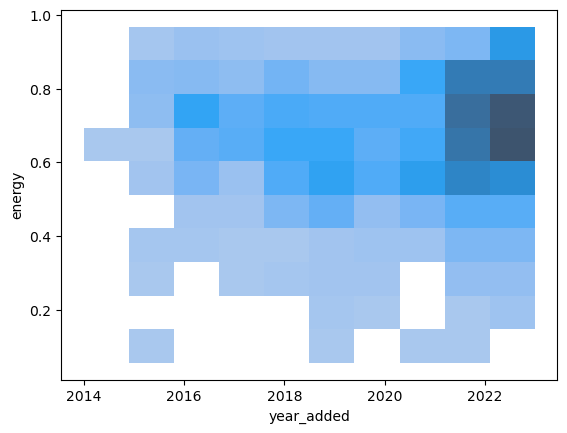

In [70]:
sns.histplot(data=df, x="year_added", y="energy", bins=10, kde=True)

In [71]:
features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "year_added"]

In [72]:
# Create pairplot of selected features
#sns.pairplot(df[features])

# Show plot
#plt.show()

<Axes: xlabel='loudness', ylabel='energy'>

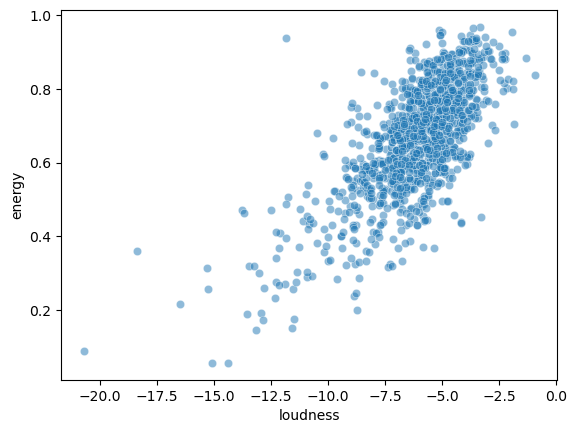

In [73]:
sns.scatterplot(data=df, x="loudness", y="energy", alpha=0.5)

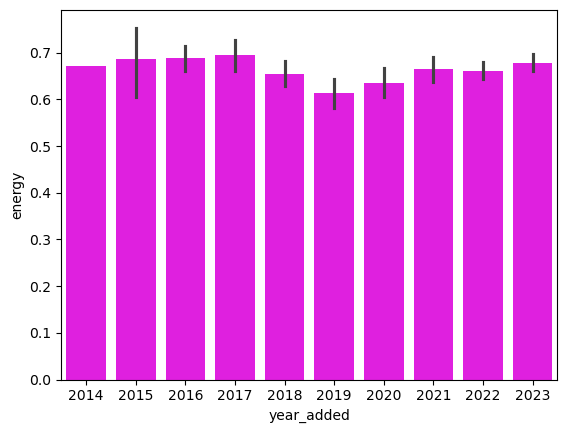

In [74]:
sns.barplot(data=df, y="energy", x="year_added", color='magenta')
plt.show()

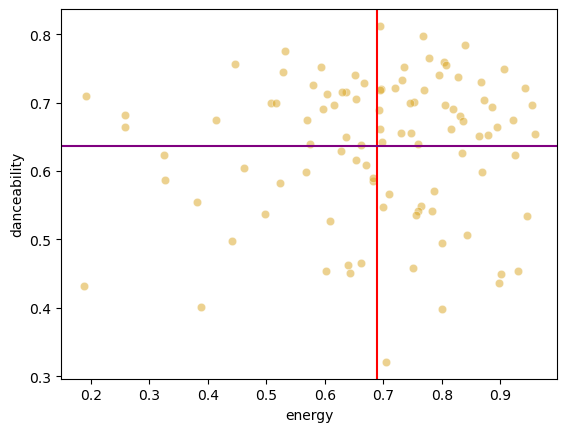

In [75]:
df = df.sort_values(by='added_at', ascending=False)
most_recently_added = df.head(100)
mean_danceability = most_recently_added['danceability'].mean()
mean_energy = most_recently_added['energy'].mean()

sns.scatterplot(data=most_recently_added, x="energy", y="danceability", alpha=0.5, color='goldenrod')
plt.axvline(x=mean_energy, color='red')
plt.axhline(y=mean_danceability, color='purple')
plt.show()

In [76]:
above_danceability_mean = most_recently_added[most_recently_added['danceability'] > mean_danceability].shape[0]
above_energy_mean = most_recently_added[most_recently_added['energy'] > mean_energy].shape[0]

print(f"Number of points above danceability mean: {above_danceability_mean}")
print(f"Number of points above energy mean: {above_energy_mean}")

Number of points above danceability mean: 61
Number of points above energy mean: 57


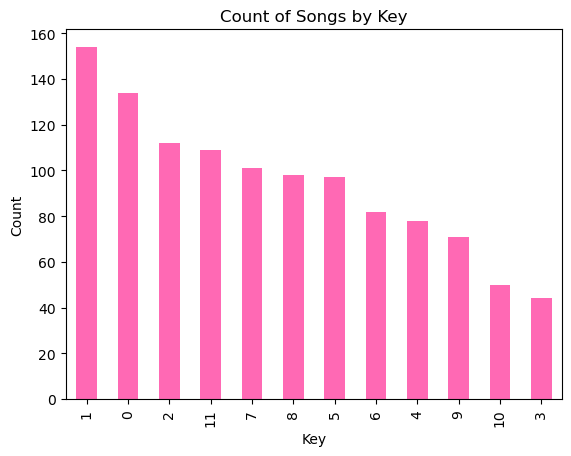

In [77]:
# count the number of occurrences of each key value
key_counts = df['key'].value_counts()

# create a bar plot of the counts
key_counts.plot(kind='bar', color="hotpink")

# set the title and axis labels
plt.title('Count of Songs by Key')
plt.xlabel('Key')
plt.ylabel('Count')

# show the plot
plt.show()

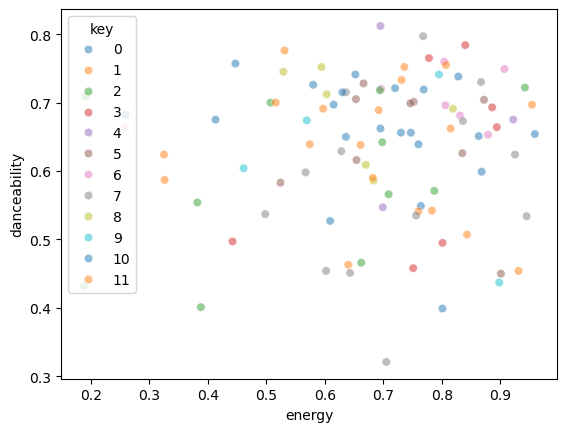

In [78]:
sns.scatterplot(data=most_recently_added, x="energy", y="danceability", hue='key', palette="tab10", alpha=0.5)
plt.show()

In [79]:
def generate_colors(num_colors):
    import random
    # Generate a list of colors with sufficient contrast
    colors = []
    for i in range(num_colors):
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
        color = f'rgb({r}, {g}, {b})'
        colors.append(color)
    return colors

hover_columns = ['name', 'artist', 'added_at', 'tempo', 'valence']
fig = px.scatter(most_recently_added, x="energy", y='danceability', color='key', color_discrete_sequence=px.colors.qualitative.Bold, hover_data=hover_columns)
fig.show()

<Axes: >

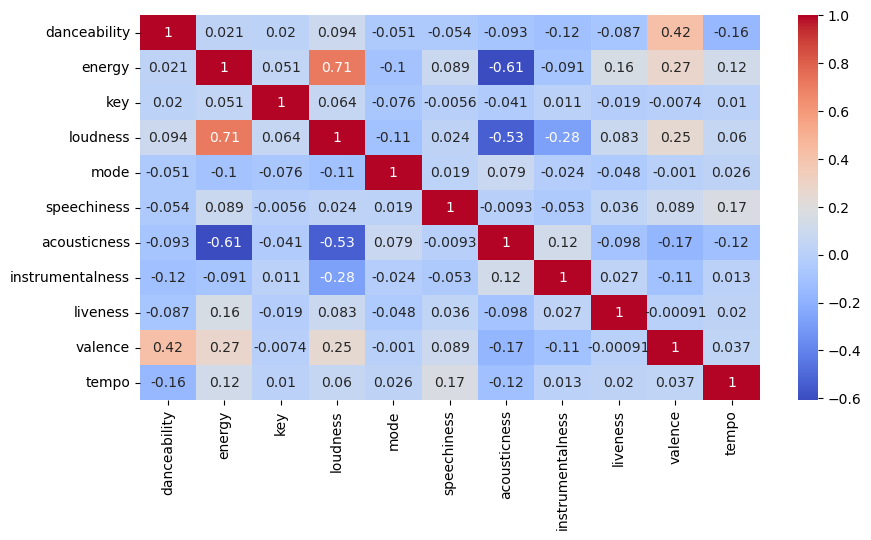

In [80]:
features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

# create a correlation matrix
corr = df[features].corr()

plt.figure(figsize=(10, 5))
# plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [81]:
df['time_signature'].value_counts()

time_signature
4    1097
3      23
5       6
1       4
Name: count, dtype: int64

In [82]:
from icecream import ic
bad_ideas = df[df['name'] == "Bad Ideas"]
ic(bad_ideas)

ic| bad_ideas:          name   artist  year_added  danceability  energy  key  loudness  mode  \
               

14  Bad Ideas  Haunter        2023         0.586   0.683    8    -7.176     1   
               
                   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
               14       0.0402         0.086          0.000077     0.389    0.208  140.016   
               
                   duration_ms  time_signature                                   uri  \
               14       188571               4  spotify:track:0pM85dw6rmaZySOd18FbFD   
               
                               added_at  
               14  2023-10-17T18:08:19Z  


,name,artist,year_added,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,uri,added_at
14,Bad Ideas,Haunter,2023,0.586,0.683,8,-7.176,1,0.0402,0.086,0.000077,0.389,0.208,140.016,188571,4,spotify:track:0pM85dw6rmaZySOd18FbFD,2023-10-17T18:08:19Z


In [83]:
hover_columns = ['name', 'artist', 'added_at', 'tempo', 'valence']
fig = px.scatter(most_recently_added, x="energy", y='danceability', color='key', color_discrete_sequence=px.colors.qualitative.Bold, hover_data=hover_columns)

# Find the index of the song "Shape of You" in the most_recently_added dataframe
song_index = most_recently_added[most_recently_added['name'] == 'Baseline'].index[0]

# Get the x and y coordinates of the point corresponding to the song
x_coord = most_recently_added.loc[song_index, 'energy']
y_coord = most_recently_added.loc[song_index, 'danceability']

# Create the arrow and text annotation
fig.add_annotation(
    x=x_coord,
    y=y_coord,
    ax=x_coord-50,
    ay=y_coord-50,
    text="Caroline Dare's 'Baseline'",
    arrowhead=1,
    showarrow=True,
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#ffffff"
    ),
    align="center",
    arrowcolor="black",
    arrowwidth=2,
    arrowsize=1,
    bordercolor="black",
    borderwidth=2,
    borderpad=4,
    bgcolor="red",
    opacity=0.8
)

# Show the plot
fig.show()

In [84]:
hover_columns = ['name', 'artist', 'added_at', 'tempo', 'valence']
fig = px.scatter(most_recently_added, x="energy", y='danceability', color='key', color_discrete_sequence=px.colors.qualitative.Bold, hover_data=hover_columns)

# Loop through the first ten songs in the dataframe
for i in range(5):
    # Get the name and artist of the song
    song_name = most_recently_added.loc[i, 'name']
    artist_name = most_recently_added.loc[i, 'artist']
    
    # Get the x and y coordinates of the point corresponding to the song
    x_coord = most_recently_added.loc[i, 'energy']
    y_coord = most_recently_added.loc[i, 'danceability']
    
    # Create the arrow and text annotation
    fig.add_annotation(
        x=x_coord,
        y=y_coord,
        ax=x_coord-50,
        ay=y_coord-50,
        text=f"'{song_name}' by {artist_name}",
        arrowhead=1,
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="#ffffff"
        ),
        align="center",
        arrowcolor="black",
        arrowwidth=2,
        arrowsize=1,
        bordercolor="black",
        borderwidth=2,
        borderpad=4,
        bgcolor="red",
        opacity=0.8,
    )

# Show the plot
fig.show()

In [85]:
hover_columns = ['name', 'artist', 'added_at', 'tempo', 'valence']
fig = px.scatter(most_recently_added, x="energy", y='danceability', color='tempo', color_continuous_scale='Turbo', hover_data=hover_columns)

# Loop through the first ten songs in the dataframe
for i in range(5):
    # Get the name and artist of the song
    song_name = most_recently_added.loc[i, 'name']
    artist_name = most_recently_added.loc[i, 'artist']
    
    # Get the x and y coordinates of the point corresponding to the song
    x_coord = most_recently_added.loc[i, 'energy']
    y_coord = most_recently_added.loc[i, 'danceability']
    
    # Create the arrow and text annotation
    fig.add_annotation(
        x=x_coord,
        y=y_coord,
        ax=x_coord-50,
        ay=y_coord-50,
        text=f"'{song_name}' by {artist_name}",
        arrowhead=1,
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="#ffffff"
        ),
        align="center",
        arrowcolor="black",
        arrowwidth=2,
        arrowsize=1,
        bordercolor="black",
        borderwidth=2,
        borderpad=4,
        bgcolor="red",
        opacity=0.8,
    )

# Show the plot
fig.show()
fig.write_html("images/plots/energy_vs_danceability_with_annotations.html")

In [86]:
mean_valence = df['valence'].mean()

In [87]:
mean_valence

0.5235605309734512